In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Task 1:** Load the data for San-Francisco 

In [19]:
# Note to myself: I had to install pyarrow
url = 'https://public-sym.s3-eu-west-1.amazonaws.com/LP-safety-US-cities/safety-SanFrancisco.parquet'
data_SF = pd.read_parquet(url)
data_SF.head(4)

,requestId,dataType,dataSubtype,dateTime,category,subcategory,status,address,latitude,longitude,source,extendedProperties
0,1,Safety,911_Fire,2018-10-02 11:54:01,Potentially Life-Threatening,Medical Incident,None,ELM ST/FRANKLIN ST,37.781286,-122.422187,None,
1,2,Safety,311_All,2018-07-08 15:00:27,Street and Sidewalk Cleaning,Bulky Items,Closed,"1536 SACRAMENTO ST, SAN FRANCISCO, CA, 94109",37.791887,-122.418188,Mobile/Open311,
2,3,Safety,311_All,2016-06-28 13:12:28,General Request - COUNTY CLERK,customer_callback,Closed,Not associated with a specific address,0.000000,0.000000,Phone,
3,7,Safety,311_All,2017-03-03 09:34:49,Temporary Sign Request,Temporary Sign Request for Other_Event_Type,Closed,"2190 NORTH POINT ST, SAN FRANCISCO, CA, 94123",37.802853,-122.443245,Phone,


In [3]:
#  The dateTime columns needs to be converted to a datetime dtype
data_SF.dateTime = pd.to_datetime(data_SF.dateTime)

In [4]:
# set requestId as index
data_SF.set_index('requestId', inplace=True)

and look at a few examples. 
For instance,

1. Choose a date randomly 

In [5]:
# date range
data_SF.dateTime.min(), data_SF.dateTime.max()

(Timestamp('2016-01-01 00:00:43'), Timestamp('2020-07-15 23:51:08'))

In [6]:
a_date = pd.to_datetime('2017-03-16')

and review the types of events that occurred at this date to get a better feeling for the day to day work of city services. 

In [7]:
data_SF[data_SF.dateTime.dt.date_SF==a_date].category.unique()

array(['Potentially Life-Threatening', 'Alarm',
       'Street and Sidewalk Cleaning', 'MUNI Feedback',
       'Temporary Sign Request', 'Non Life-threatening',
       'Litter Receptacles', 'Graffiti', 'General Request - MTA',
       'Encampments', 'Sewer Issues', 'Illegal Postings', 'SFHA Requests',
       'Noise Report', 'Abandoned Vehicle', 'General Request - PUC',
       'Streetlights', 'Street Defects', 'Damaged Property',
       'Catch Basin Maintenance', 'General Request - PUBLIC WORKS',
       'Tree Maintenance', 'Sidewalk or Curb', 'Rec and Park Requests',
       'Blocked Street or SideWalk', 'General Request - COUNTY CLERK',
       'Sign Repair', 'Color Curb', 'Residential Building Request',
       'Homeless Concerns', 'General Request - BUILDING INSPECTION',
       'General Request - CHILDREN YOUTH FAMILIES', 'Fire',
       'General Request - DPH', 'General Request - DISTRICT ATTORNEY',
       '311 External Request', 'General Request - OCC',
       'General Request - 311CUST

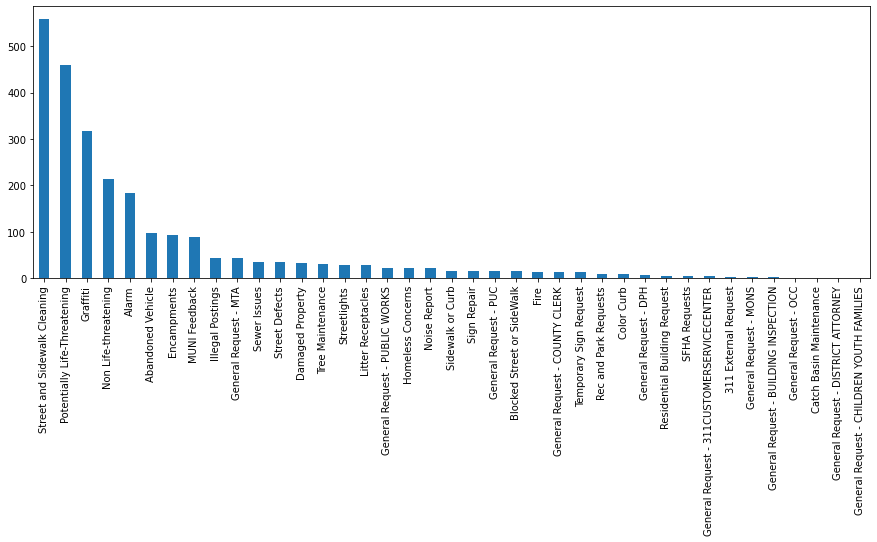

In [8]:
data_SF[data_SF.dateTime.dt.date_SF==a_date].category.value_counts().plot(kind='bar', figsize=(15,5))

2. Pick an address in the data and review its history of safety events.

In [9]:
a_street = '2100 Block of HARRISON ST'

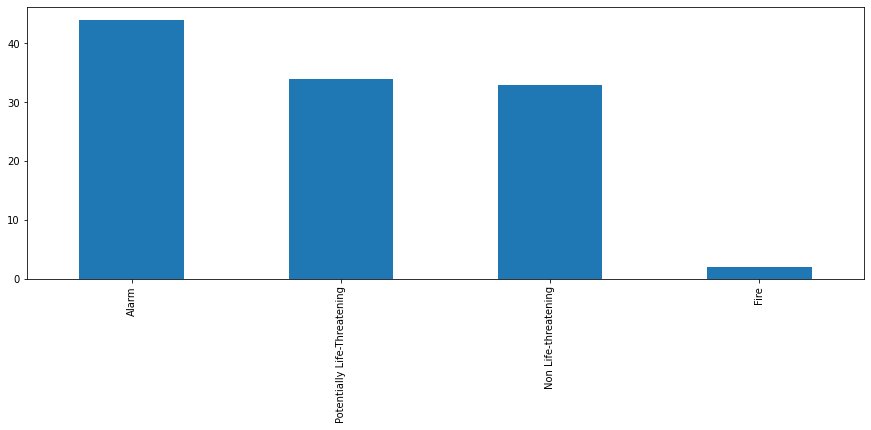

In [10]:
data_SF[data_SF.address==a_street].category.value_counts().plot(kind='bar', figsize=(15,5))

**Task 2:** Identify potential data quality issues, including:

1. missing values (or empty values for string columns)

In [11]:
# percentage of missing values
100*data_SF.isnull().sum()/len(data)

dataType               0.000000
dataSubtype            0.000000
dateTime               0.000000
category               0.124606
subcategory            0.000000
status                35.492003
address                0.000076
latitude               0.000000
longitude              0.000000
source                35.492003
extendedProperties     0.000000
dtype: float64

2. columns that contain no information

In [12]:
100*np.sum(data_SF.extendedProperties=='')/len(data)

100.0

3. columns that are of the wrong type (e.g. numbers encoded as strings).

In [13]:
data_SF.dtypes

dataType                      object
dataSubtype                   object
dateTime              datetime64[ns]
category                      object
subcategory                   object
status                        object
address                       object
latitude                     float64
longitude                    float64
source                        object
extendedProperties            object
dtype: object

3. rows with identical content (duplicate rows)

In [17]:
100*np.sum(data_SF.duplicated())/len(data)

0.0

In [16]:
data_SF.drop_duplicates(inplace=True)

4. categorical columns (that have less than a few 100 unique string values)

In [33]:
for column in data_SF.columns:
    if len(data_SF[column].unique())<=100:
        print(column)
        data_SF[column] = data_SF[column].astype('category')

dataType
dataSubtype
category
status
source
extendedProperties


In [34]:
data_SF.dtypes

requestId                int64
dataType              category
dataSubtype           category
dateTime                object
category              category
subcategory             object
status                category
address                 object
latitude               float64
longitude              float64
source                category
extendedProperties    category
dtype: object

In [36]:
data_SF.memory_usage()

Index                      128
requestId             31671112
dataType               3958977
dataSubtype            3958985
dateTime              31671112
category               3962209
subcategory           31671112
status                 3958985
address               31671112
latitude              31671112
longitude             31671112
source                 3959273
extendedProperties     3958977
dtype: int64

## Data preparation function

In [4]:
# Note to myself: I had to install pyarrow
url = 'https://public-sym.s3-eu-west-1.amazonaws.com/LP-safety-US-cities/safety-SanFrancisco.parquet'
data_SF = pd.read_parquet(url)
data_SF.head(1)

,requestId,dataType,dataSubtype,dateTime,category,subcategory,status,address,latitude,longitude,source,extendedProperties
0,1,Safety,911_Fire,2018-10-02 11:54:01,Potentially Life-Threatening,Medical Incident,None,ELM ST/FRANKLIN ST,37.781286,-122.422187,None,


In [ ]:
url = 'https://public-sym.s3-eu-west-1.amazonaws.com/LP-safety-US-cities/safety-Nyc.parquet'
data_NYC = pd.read_parquet(url)
data_NYC.head(1)

In [ ]:
def data_prep(df):
    #  The dateTime columns needs to be converted to a datetime dtype
    df.dateTime = pd.to_datetime(df.dateTime)
    
    # set requestId as index
    df.set_index('requestId', inplace=True)
    
    # drop empty columns
    df.drop('extendedProperties', axis=1, inplace=True)

    # drop duplicates
    df.drop_duplicates(inplace=True)
    
    # categorical columns
    for column in data_SF.columns:
        if len(df[column].unique())<=100:
            df[column] = df[column].astype('category')

In [ ]:
data_prep(data_SF)
data_SF.head(1)

In [ ]:
data_prep(data_NYC)
data_NYC.head(1)

In [ ]:
data_SF.to_parquet('safety-SanFrancisco-1.parquet')
data_NYC.to_parquet('safety-Nyc-1.parquet')